# MRI Skull Stripping Baseline Models
This jupyter notebook includes all the experiments performed on a baseline models including linear models like random forest, decision tree and etc.

In [8]:
#import everything
import pydicom
import numpy as np

from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

### This is a regular image that needs to strip the skull

C:\Users\KeplerC\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint16 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\KeplerC\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  import sys


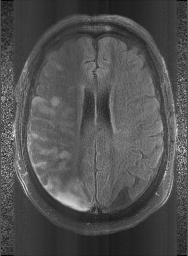

In [9]:
#a regular image file should look like this
from scipy.misc import toimage
train_file = "./data/IM-1081-0017.dcm"
ground_truth_file = "./data/BM-1081-0017.dcm"
input_file = pydicom.read_file(train_file)
image = preprocessing.scale(input_file.pixel_array)
toimage(image)

### A ground truth file as a bitmap

C:\Users\KeplerC\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  after removing the cwd from sys.path.


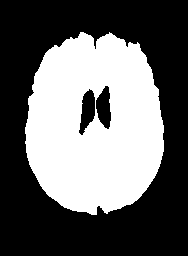

In [10]:
#loading a sample ground truth file
ground_truth = pydicom.read_file(ground_truth_file)
gt = ground_truth.pixel_array
toimage(gt)

In [11]:
# Hyperparameters 
m = 3 #the size of local patch

In [14]:
# a function that prepares training data for a single image
# it takes into acccount 
def prepare_training_data_for_an_image(image, gt):
    training_data = []
    training_label = []

    #prepare training
    for x in range(m, image.shape[0] - m):
        for y in range(m, image.shape[1] - m):
            #feature selection: 
            # *color
            # *px
            # *py
            training_data_for_pixel = [image[x][y], x, y] 
            # patch
            for px in range(x - m, x + m + 1):
                for py in range(y - m, y + m + 1):
                    training_data_for_pixel.append(image[px][py])
            training_label += [0 if gt[x][y] < 0.5 else 1]
            training_data.append(training_data_for_pixel)
    return training_data, training_label


In [15]:
import os 

#loading the rest images in data folder
training_data = []
training_label = []
counter = 0 

#iterate through all files 
for path in os.listdir("./data/"):
    filename = ""
    if(path.startswith("IM")):
        filename = path
        if(counter > 3):
            continue
    else:
        continue
    
    #for each file, read in pixel and ground truth 
    input_file = pydicom.read_file("./data/" + path)
    image = preprocessing.scale(input_file.pixel_array)
    path = "B" + path[1:]
    ground_truth = pydicom.read_file("./data/" + path)
    print(path)
    gt = ground_truth.pixel_array
    
    d, l = prepare_training_data_for_an_image(image, gt)
    training_data += d
    training_label += l

C:\Users\KeplerC\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint16 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


BM-1081-0017.dcm
BM-1081-0018.dcm
BM-1081-0019.dcm
BM-2607-0019.dcm
BM-26936-0017.dcm
BM-6175-0017.dcm
BM-6938-0017.dcm
BM-6938-0018.dcm
BM-7903-0017.dcm
BM-7903-0019.dcm
BM-8941-0014.dcm
BM-8941-0016.dcm


In [24]:
from sklearn.linear_model import LogisticRegression
my_classifier = RandomForestClassifier()
my_classifier.fit(training_data, training_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [25]:
pred = my_classifier.predict(training_data)
accuracy_score(training_label, pred)

0.9964570063694268

In [26]:
#prediction
image = preprocessing.scale(input_file.pixel_array)
stripped_image = image
proc = []
for x in range(m, stripped_image.shape[0] - m):
    for y in range(m, stripped_image.shape[1] - m):
        l = [image[x][y], x, y]
        for px in range(x - m, x + m + 1):
            for py in range(y - m, y + m + 1):
                l.append(stripped_image[px][py])
        proc.append(l)
pred = my_classifier.predict(training_data)

counter = 0
for x in range(stripped_image.shape[0]):
    for y in range(stripped_image.shape[1]):
        if(x < m or y < m or x > stripped_image.shape[0] - m - 1 or y > stripped_image.shape[1] - m -1):
            stripped_image[x][y] = 0
        else:
            if(gt[x][y] <  1):
                stripped_image[x][y] = 0
            #if pred[counter] == 0:
            #    stripped_image[x][y] = 0 
            counter += 1


C:\Users\KeplerC\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint16 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


C:\Users\KeplerC\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  """Entry point for launching an IPython kernel.


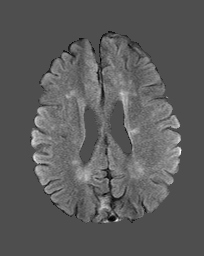

In [27]:
toimage(stripped_image)